In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Three Steps For Exploratory Data Analysis                                    
1.Getting know the data                                       
2.Data Preprocessing(MISSING VALUES)                                 
3.Cross Tables & Data Visulisation

# Getting Know The Data

In [5]:
df = pd.read_csv("income(1).csv")
main=df.copy(deep=True)
print(main.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
age              31978 non-null int64
JobType          31978 non-null object
EdType           31978 non-null object
maritalstatus    31978 non-null object
occupation       31978 non-null object
relationship     31978 non-null object
race             31978 non-null object
gender           31978 non-null object
capitalgain      31978 non-null int64
capitalloss      31978 non-null int64
hoursperweek     31978 non-null int64
nativecountry    31978 non-null object
SalStat          31978 non-null object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None


In [6]:
main.isnull()
print("Data without missing values \n",main.isnull().sum())
df = pd.read_csv("income(1).csv",na_values=['?'])

('Data without missing values \n', age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64)


# 2.Data Preporcessing(Missing Value)

In [17]:
#summary of numerical variables
summary_num = df.describe()
print(summary_num)

                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000


In [18]:
#summary of categroail variables
summary_cate = df.describe(include= 'object')
print(summary_cate)

         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368                14692             4038        12947   

          race gender   nativecountry                        SalStat  
count    31978  31978           31978                          31978  
unique       5      2              41                              2  
top      White   Male   United-States   less than or equal to 50,000  
freq     27430  21370           29170                          24283  


In [9]:
df['JobType'].value_counts()
df['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 ?                    1816
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [10]:
print(np.unique(df['JobType']))
print(np.unique(df['occupation']))

[' ?' ' Federal-gov' ' Local-gov' ' Never-worked' ' Private'
 ' Self-emp-inc' ' Self-emp-not-inc' ' State-gov' ' Without-pay']
[' ?' ' Adm-clerical' ' Armed-Forces' ' Craft-repair' ' Exec-managerial'
 ' Farming-fishing' ' Handlers-cleaners' ' Machine-op-inspct'
 ' Other-service' ' Priv-house-serv' ' Prof-specialty' ' Protective-serv'
 ' Sales' ' Tech-support' ' Transport-moving']


In [11]:
df.isnull().sum()
Missing = df[df.isnull().any(axis=1)]
df2=df.dropna(axis=0)
#Relationships between independent variables
correlation=df2.corr()
df2.columns

Index([u'age', u'JobType', u'EdType', u'maritalstatus', u'occupation',
       u'relationship', u'race', u'gender', u'capitalgain', u'capitalloss',
       u'hoursperweek', u'nativecountry', u'SalStat'],
      dtype='object')

In [12]:
gender=pd.crosstab(index= df2["gender"],columns= 'count',normalize=True)
print(gender)

col_0       count
gender           
 Female  0.331728
 Male    0.668272


In [13]:
gender_salary= pd.crosstab(index= df2["gender"],columns= ['salary'],margins=True,normalize='index')
print(gender_salary)

col_0    salary
gender         
 Female     1.0
 Male       1.0
All         1.0


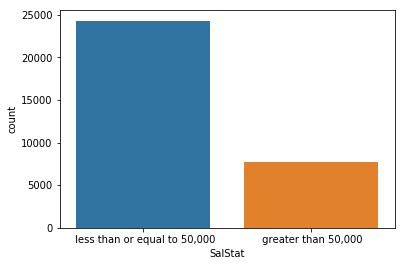

In [14]:
salary = sns.countplot(df2['SalStat'])

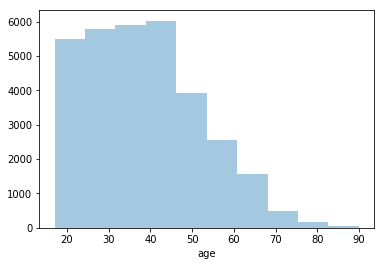

In [15]:
sns.distplot(df2['age'],bins=10,kde=False)

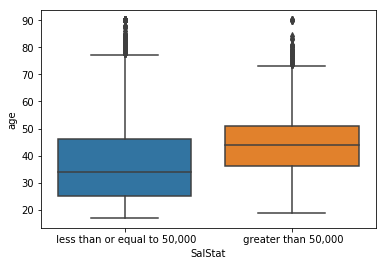

In [13]:
sns.boxplot("SalStat","age",data=df2)

In [16]:
df2.groupby('SalStat')['age'].median()

SalStat
 greater than 50,000             44
 less than or equal to 50,000    34
Name: age, dtype: int64

## Building A Logistic Regression Model 

In [21]:
df = pd.read_csv("income(1).csv",na_values=['?'])
df2 = df.copy()
df2['SalStat']=df2['SalStat'].map({"Less than or eqal to 50000":0,"Greater Than or equal to 500000":1})
print(df2)

       age            JobType         EdType           maritalstatus  \
0       45            Private        HS-grad                Divorced   
1       24        Federal-gov        HS-grad           Never-married   
2       44            Private   Some-college      Married-civ-spouse   
3       27            Private            9th           Never-married   
4       20            Private   Some-college           Never-married   
5       44            Private        HS-grad                 Widowed   
6       51            Private        HS-grad      Married-civ-spouse   
7       20            Private        HS-grad      Married-civ-spouse   
8       17                  ?           11th           Never-married   
9       19            Private        HS-grad           Never-married   
10      45       Self-emp-inc   Some-college      Married-civ-spouse   
11      60            Private        HS-grad      Married-civ-spouse   
12      44   Self-emp-not-inc        HS-grad      Married-civ-sp